In [1]:
import pandas as pd
import numpy as np

## 数据展示及预处理 

In [2]:
#原始数据展示，爬取后已经在excel中去掉部分链接及异常值，得到2018条数据
mydata = pd.read_csv('D:\研究生课件\编程基础\data.csv')
mydata

,编号,租金,租赁方式,地铁距离,房屋类型,房屋面积,朝向,楼层,车位,用电,采暖,电梯,用水,燃气,区域
0,BJ2883227630046281728,30000,整租,175m,1房间0卫,86.00,南,低楼层,租用车位,商电,集中供暖,无,商水,有,海淀
1,BJ2904332741866954752,55000,整租,508m,3室2厅2卫,183.55,南/北,低楼层,租用车位,民电,集中供暖,有,民水,有,西城
2,BJ2803415084380979200,100000,整租,473m,7室9厅5卫,376.00,南/北,低楼层,免费使用,民电,自采暖,无,民水,有,亦庄开发区
3,BJ2794283489082744832,23000,整租,832m,1室1厅1卫,88.00,东南,低楼层,租用车位,商电,集中供暖,有,民水,无,朝阳
4,BJ2903070656449224704,20000,整租,574m,3室1厅1卫,78.00,东南,中楼层,租用车位,民电,集中供暖,有,民水,有,西城
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,BJ1572582999709450240,2900,整租,NaN,2室1厅1卫,105.55,南/北,中楼层,租用车位,民电,集中供暖,无,民水,有,房山
2014,BJ1571841338373046272,2600,整租,NaN,3室1厅1卫,103.86,南/北,低楼层,免费使用,民电,集中供暖,无,民水,有,房山
2015,BJ1567017755364818944,2100,整租,1166m,2房间1卫,93.70,西/北,低楼层,免费使用,商电,集中供暖,有,商水,无,房山
2016,BJ1570989956023713792,5000,整租,NaN,4室2厅2卫,226.00,南/北,中楼层,租用车位,民电,集中供暖,无,民水,有,顺义


In [3]:
#将房间朝向进行one-hot编码，便于可视化与建模
import re
n = len(mydata)
# 查询是否含有东南西南东北西北
direction1 = pd.DataFrame(0, index=[1, 2, 3, 4], columns=mydata.index)
for i in range(n):
    if re.search("东南", mydata["朝向"][i]):
        direction1.loc[1, i] = 1
    if re.search("西南", mydata["朝向"][i]):
        direction1.loc[2, i] = 1
    if re.search("东北", mydata["朝向"][i]):
        direction1.loc[3, i] = 1
    if re.search("西北", mydata["朝向"][i]):
        direction1.loc[4, i] = 1

# 去掉东南西南东北西北
direction = []
for i in range(n):
    direction.append(re.sub("东南|西南|东北|西北", "", mydata["朝向"][i]))

# 查询是否含有东南西北
direction2 = pd.DataFrame(0, index=[1, 2, 3, 4], columns=mydata.index)
for i in range(n):
    if re.search("东", direction[i-1]):
        direction2.loc[1, i] = 1
    if re.search("南", direction[i-1]):
        direction2.loc[2, i] = 1
    if re.search("西", direction[i-1]):
        direction2.loc[3, i] = 1
    if re.search("北", direction[i-1]):
        direction2.loc[4, i] = 1

# 插入八个哑变量
mydata["东南"] = direction1.loc[1, :].values
mydata["西南"] = direction1.loc[2, :].values
mydata["东北"] = direction1.loc[3, :].values
mydata["西北"] = direction1.loc[4, :].values
mydata["东"] = direction2.loc[1, :].values
mydata["南"] = direction2.loc[2, :].values
mydata["西"] = direction2.loc[3, :].values
mydata["北"] = direction2.loc[4, :].values

mydata

,编号,租金,租赁方式,地铁距离,房屋类型,房屋面积,朝向,楼层,车位,用电,...,燃气,区域,东南,西南,东北,西北,东,南,西,北
0,BJ2883227630046281728,30000,整租,175m,1房间0卫,86.00,南,低楼层,租用车位,商电,...,有,海淀,0,0,0,0,0,1,0,1
1,BJ2904332741866954752,55000,整租,508m,3室2厅2卫,183.55,南/北,低楼层,租用车位,民电,...,有,西城,0,0,0,0,0,1,0,0
2,BJ2803415084380979200,100000,整租,473m,7室9厅5卫,376.00,南/北,低楼层,免费使用,民电,...,有,亦庄开发区,0,0,0,0,0,1,0,1
3,BJ2794283489082744832,23000,整租,832m,1室1厅1卫,88.00,东南,低楼层,租用车位,商电,...,无,朝阳,1,0,0,0,0,1,0,1
4,BJ2903070656449224704,20000,整租,574m,3室1厅1卫,78.00,东南,中楼层,租用车位,民电,...,有,西城,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,BJ1572582999709450240,2900,整租,NaN,2室1厅1卫,105.55,南/北,中楼层,租用车位,民电,...,有,房山,0,0,0,0,0,1,1,1
2014,BJ1571841338373046272,2600,整租,NaN,3室1厅1卫,103.86,南/北,低楼层,免费使用,民电,...,有,房山,0,0,0,0,0,1,0,1
2015,BJ1567017755364818944,2100,整租,1166m,2房间1卫,93.70,西/北,低楼层,免费使用,商电,...,无,房山,0,0,0,0,0,1,0,1
2016,BJ1570989956023713792,5000,整租,NaN,4室2厅2卫,226.00,南/北,中楼层,租用车位,民电,...,有,顺义,0,0,0,0,0,0,1,1


In [4]:
#处理地铁距离变量，若为无或NaN则处理为2km（表示2km内没有地铁）
mydata['地铁距离'].fillna('2000m',inplace = True) #先处理缺失值
n = len(mydata)
dis = [[0]*n]
for i in range(n):
    match = re.search(r'\d+', mydata['地铁距离'][i])
    if match:
        num_str = match.group()  # 获取匹配到的数字字符串
        num = int(num_str)  # 将字符串转换为整数类型
        dis[0][i] = num
    else:
        dis[0][i] = 2000
mydata.drop('地铁距离',axis = 1,inplace = True)
mydata["地铁距离"] = dis[0]
mydata

,编号,租金,租赁方式,房屋类型,房屋面积,朝向,楼层,车位,用电,采暖,...,区域,东南,西南,东北,西北,东,南,西,北,地铁距离
0,BJ2883227630046281728,30000,整租,1房间0卫,86.00,南,低楼层,租用车位,商电,集中供暖,...,海淀,0,0,0,0,0,1,0,1,175
1,BJ2904332741866954752,55000,整租,3室2厅2卫,183.55,南/北,低楼层,租用车位,民电,集中供暖,...,西城,0,0,0,0,0,1,0,0,508
2,BJ2803415084380979200,100000,整租,7室9厅5卫,376.00,南/北,低楼层,免费使用,民电,自采暖,...,亦庄开发区,0,0,0,0,0,1,0,1,473
3,BJ2794283489082744832,23000,整租,1室1厅1卫,88.00,东南,低楼层,租用车位,商电,集中供暖,...,朝阳,1,0,0,0,0,1,0,1,832
4,BJ2903070656449224704,20000,整租,3室1厅1卫,78.00,东南,中楼层,租用车位,民电,集中供暖,...,西城,1,0,0,0,0,0,0,0,574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,BJ1572582999709450240,2900,整租,2室1厅1卫,105.55,南/北,中楼层,租用车位,民电,集中供暖,...,房山,0,0,0,0,0,1,1,1,2000
2014,BJ1571841338373046272,2600,整租,3室1厅1卫,103.86,南/北,低楼层,免费使用,民电,集中供暖,...,房山,0,0,0,0,0,1,0,1,2000
2015,BJ1567017755364818944,2100,整租,2房间1卫,93.70,西/北,低楼层,免费使用,商电,集中供暖,...,房山,0,0,0,0,0,1,0,1,1166
2016,BJ1570989956023713792,5000,整租,4室2厅2卫,226.00,南/北,中楼层,租用车位,民电,集中供暖,...,顺义,0,0,0,0,0,0,1,1,2000


In [5]:
#计算单位面积租金
mydata['单位面积租金']=mydata['租金']/mydata['房屋面积']
mydata

,编号,租金,租赁方式,房屋类型,房屋面积,朝向,楼层,车位,用电,采暖,...,东南,西南,东北,西北,东,南,西,北,地铁距离,单位面积租金
0,BJ2883227630046281728,30000,整租,1房间0卫,86.00,南,低楼层,租用车位,商电,集中供暖,...,0,0,0,0,0,1,0,1,175,348.837209
1,BJ2904332741866954752,55000,整租,3室2厅2卫,183.55,南/北,低楼层,租用车位,民电,集中供暖,...,0,0,0,0,0,1,0,0,508,299.645873
2,BJ2803415084380979200,100000,整租,7室9厅5卫,376.00,南/北,低楼层,免费使用,民电,自采暖,...,0,0,0,0,0,1,0,1,473,265.957447
3,BJ2794283489082744832,23000,整租,1室1厅1卫,88.00,东南,低楼层,租用车位,商电,集中供暖,...,1,0,0,0,0,1,0,1,832,261.363636
4,BJ2903070656449224704,20000,整租,3室1厅1卫,78.00,东南,中楼层,租用车位,民电,集中供暖,...,1,0,0,0,0,0,0,0,574,256.410256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,BJ1572582999709450240,2900,整租,2室1厅1卫,105.55,南/北,中楼层,租用车位,民电,集中供暖,...,0,0,0,0,0,1,1,1,2000,27.475130
2014,BJ1571841338373046272,2600,整租,3室1厅1卫,103.86,南/北,低楼层,免费使用,民电,集中供暖,...,0,0,0,0,0,1,0,1,2000,25.033699
2015,BJ1567017755364818944,2100,整租,2房间1卫,93.70,西/北,低楼层,免费使用,商电,集中供暖,...,0,0,0,0,0,1,0,1,1166,22.411953
2016,BJ1570989956023713792,5000,整租,4室2厅2卫,226.00,南/北,中楼层,租用车位,民电,集中供暖,...,0,0,0,0,0,0,1,1,2000,22.123894


In [6]:
#保留用于建模的列
columns = ['单位面积租金','地铁距离','房屋面积','楼层','车位','用电','采暖','电梯','用水','燃气','区域','北','东北','东','东南','南','西南','西','西北']
data = mydata[columns]
data

,单位面积租金,地铁距离,房屋面积,楼层,车位,用电,采暖,电梯,用水,燃气,区域,北,东北,东,东南,南,西南,西,西北
0,348.837209,175,86.00,低楼层,租用车位,商电,集中供暖,无,商水,有,海淀,1,0,0,0,1,0,0,0
1,299.645873,508,183.55,低楼层,租用车位,民电,集中供暖,有,民水,有,西城,0,0,0,0,1,0,0,0
2,265.957447,473,376.00,低楼层,免费使用,民电,自采暖,无,民水,有,亦庄开发区,1,0,0,0,1,0,0,0
3,261.363636,832,88.00,低楼层,租用车位,商电,集中供暖,有,民水,无,朝阳,1,0,0,1,1,0,0,0
4,256.410256,574,78.00,中楼层,租用车位,民电,集中供暖,有,民水,有,西城,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,27.475130,2000,105.55,中楼层,租用车位,民电,集中供暖,无,民水,有,房山,1,0,0,0,1,0,1,0
2014,25.033699,2000,103.86,低楼层,免费使用,民电,集中供暖,无,民水,有,房山,1,0,0,0,1,0,0,0
2015,22.411953,1166,93.70,低楼层,免费使用,商电,集中供暖,有,商水,无,房山,1,0,0,0,1,0,0,0
2016,22.123894,2000,226.00,中楼层,租用车位,民电,集中供暖,无,民水,有,顺义,1,0,0,0,0,0,1,0


## 数据可视化 

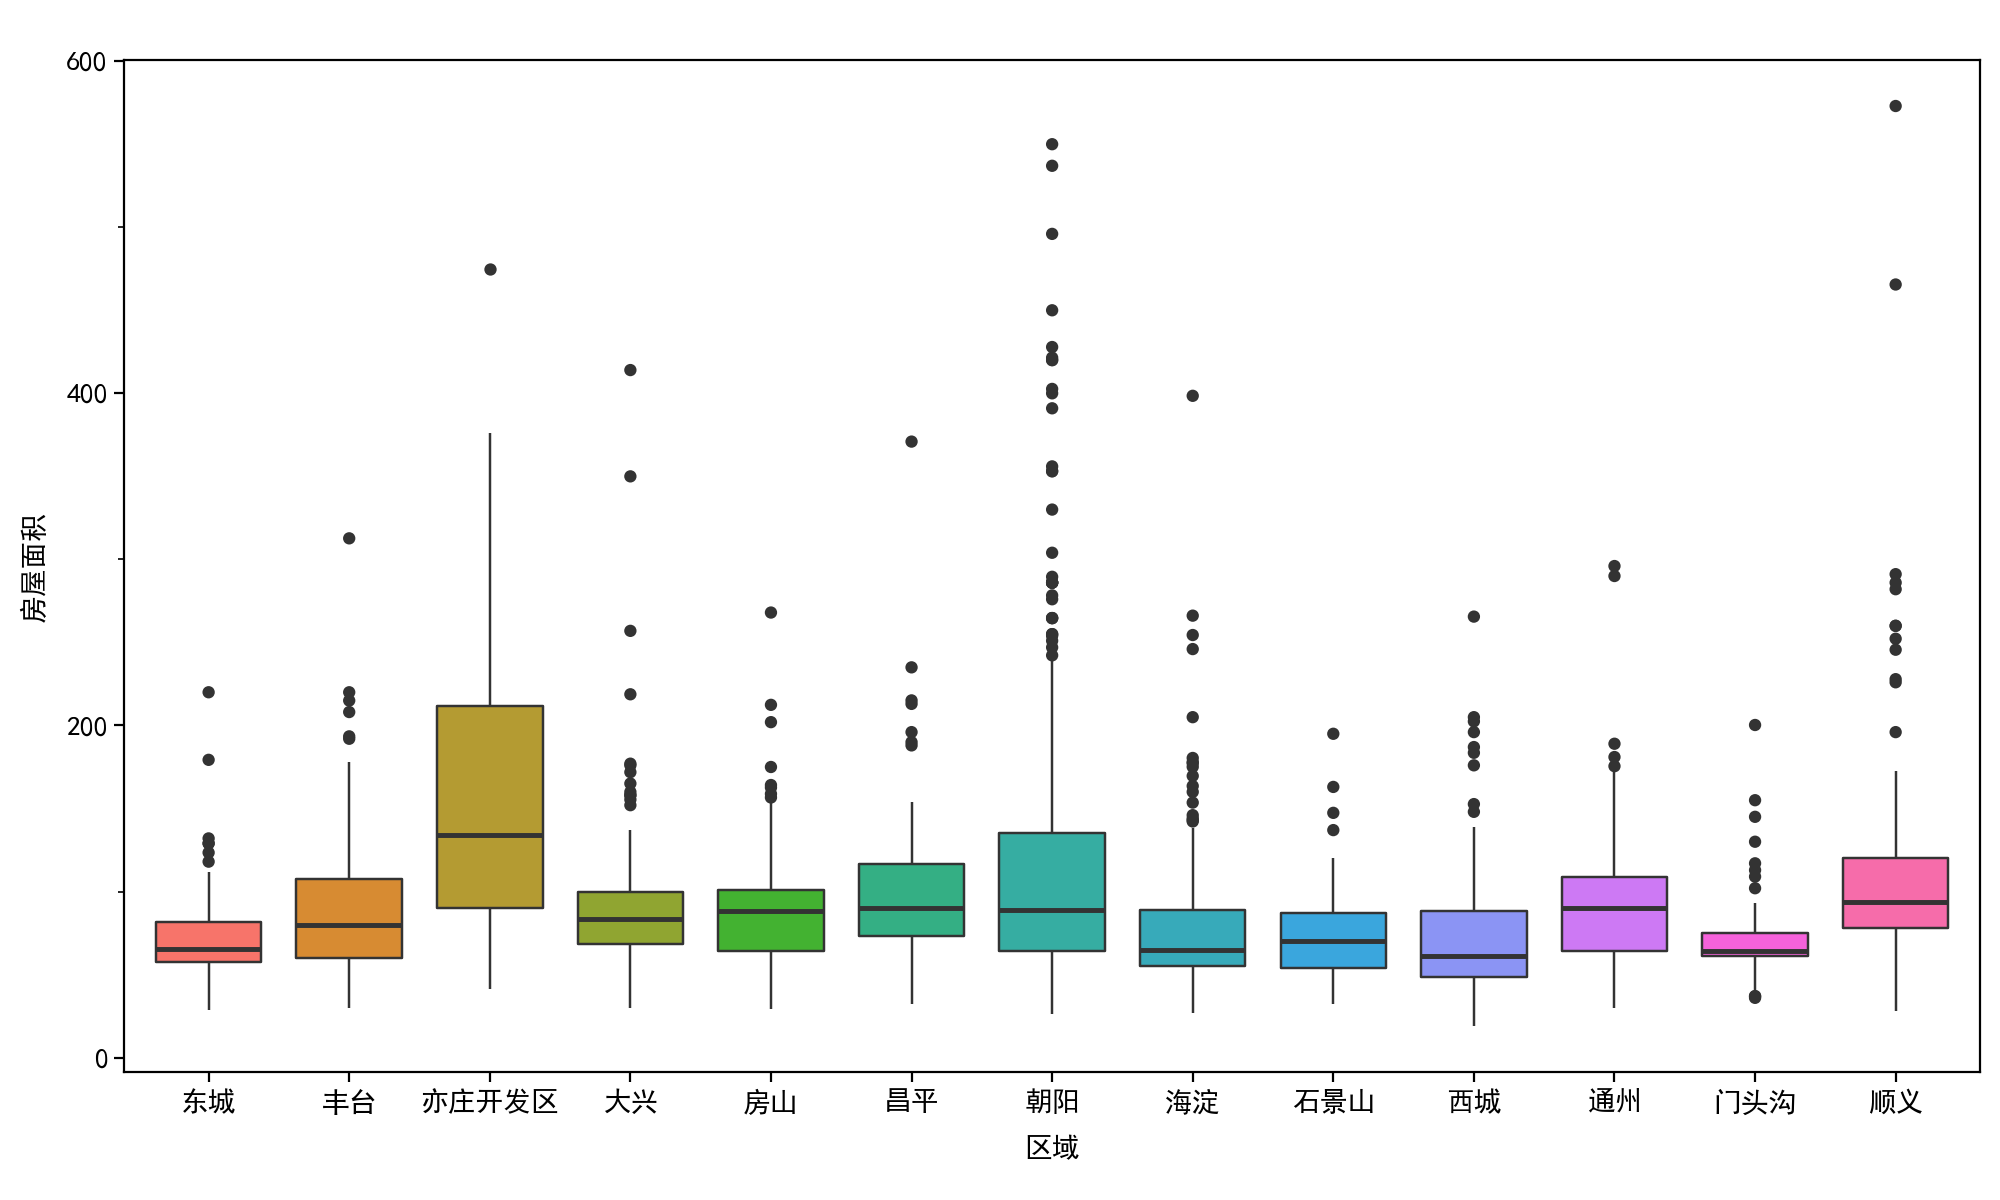

<Figure Size: (1000 x 600)>

In [93]:
from plotnine import *
#不同区域房屋面积分布的箱线图

(
    ggplot(data,aes(x='区域',y="房屋面积",fill="区域"))
    + geom_boxplot(show_legend=False)
    + scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
    + theme_matplotlib()
    + theme(
       dpi=100,
       figure_size=(10,6))
    + theme(text=element_text(family="SimHei"))
)

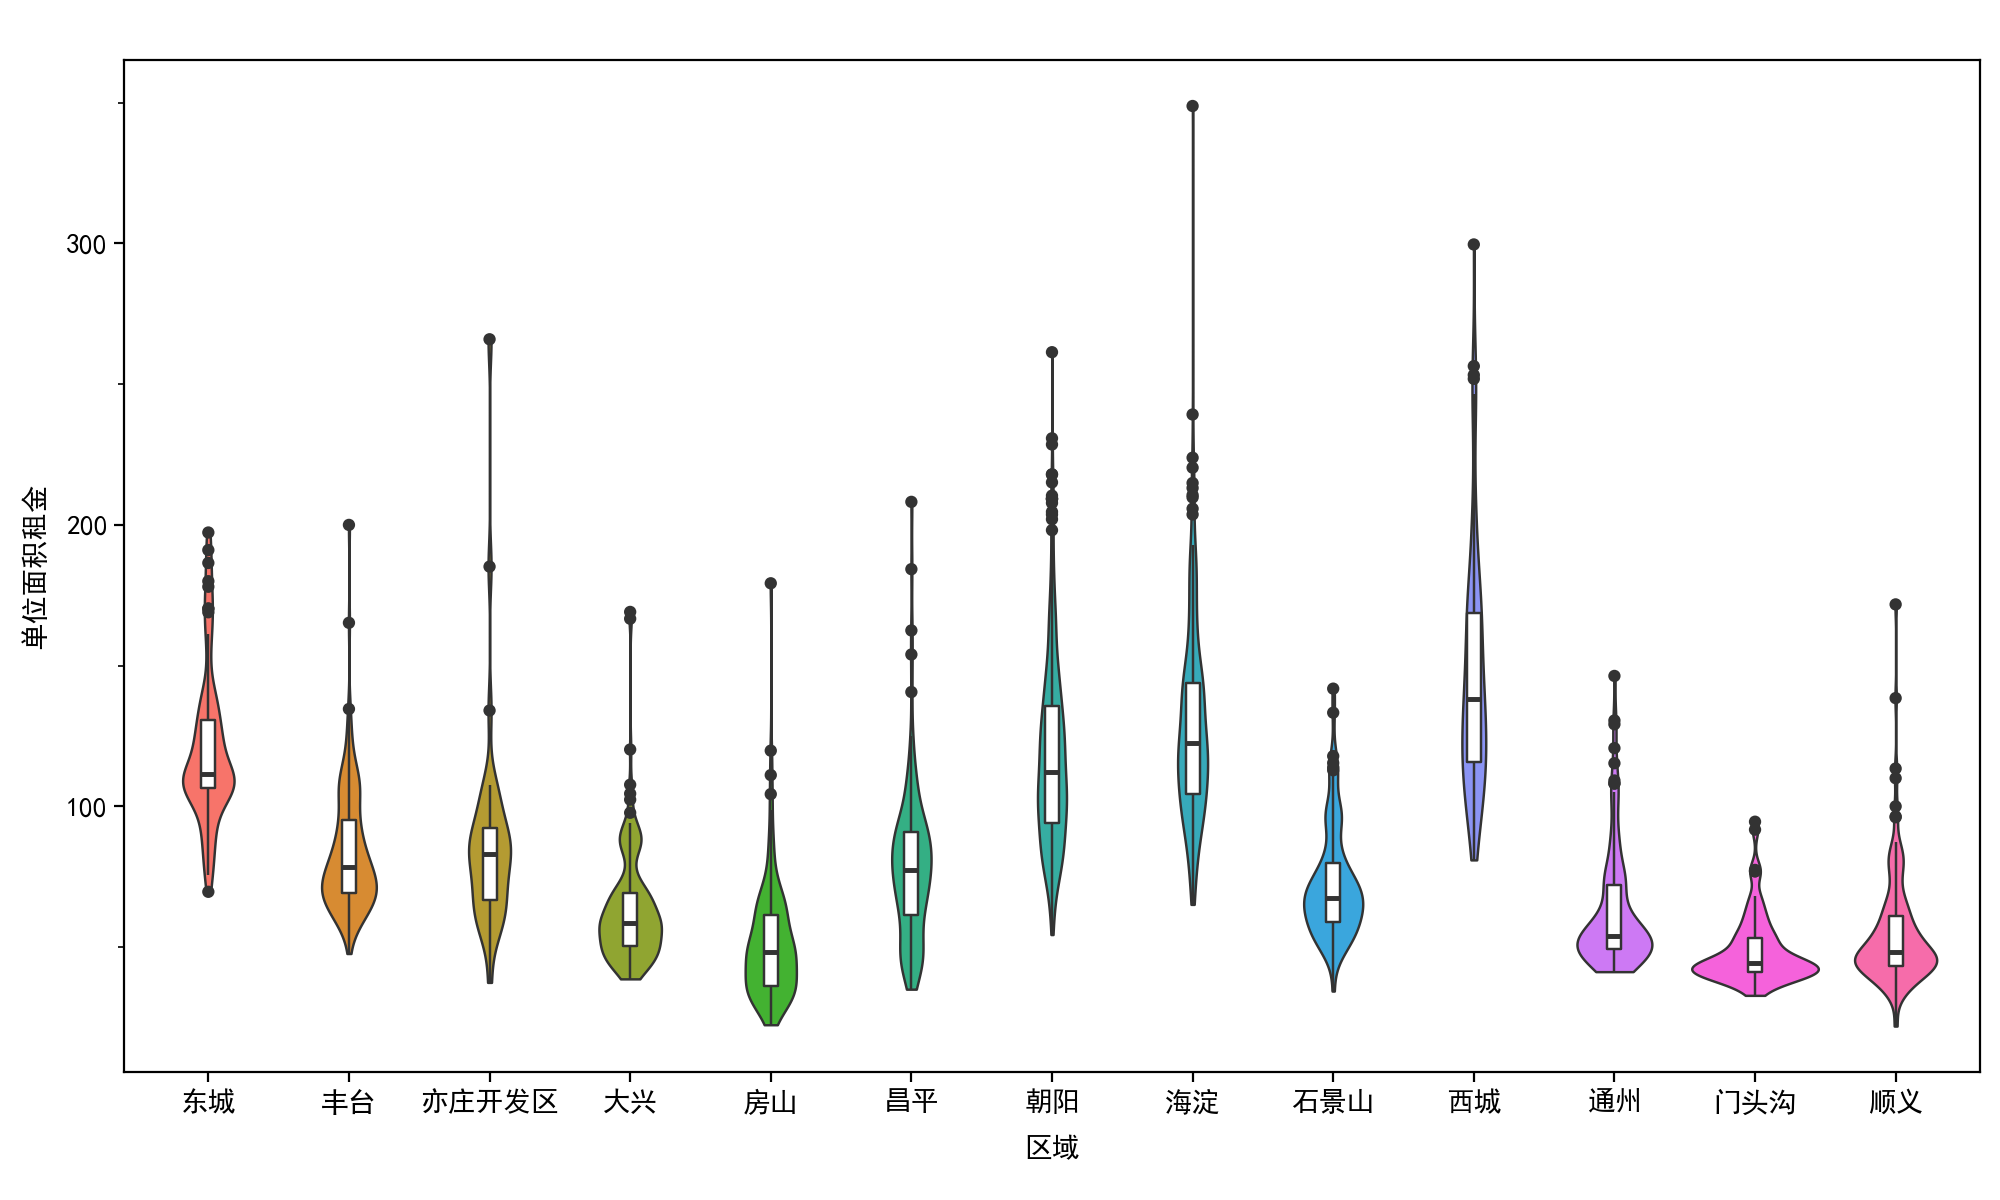

<Figure Size: (1000 x 600)>

In [95]:
#不同区域房屋的单位面积租金分布的小提琴图
(
    ggplot(data,aes(x='区域',y="单位面积租金",fill="区域"))
    + geom_violin(show_legend=False)
    + geom_boxplot(fill="white",width=0.1,show_legend=False)
    + scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
    + theme_matplotlib()
    + theme(
       dpi=100,
       figure_size=(10,6))
    + theme(text=element_text(family="SimHei"))
)

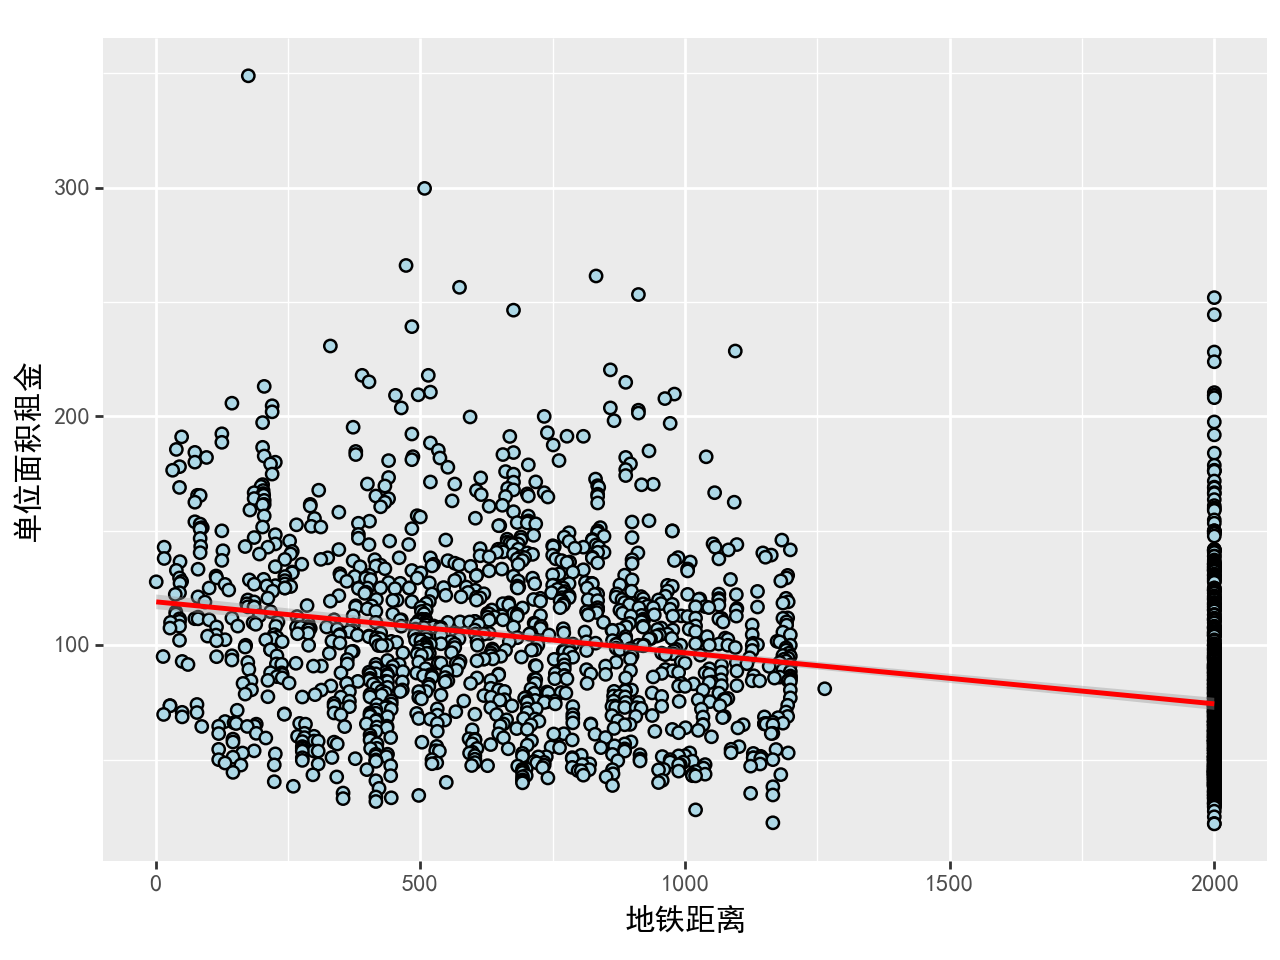

<Figure Size: (640 x 480)>

In [96]:
#单位面积租金与地铁距离的散点图
(
    ggplot(data, aes('地铁距离', '单位面积租金'))
    + geom_point(fill='lightblue', color='k', size=2, shape='o')
    + geom_smooth(method='lm', span=0.4, se=True, color='red')
    + theme(text=element_text(family="SimHei"))
)

C:\Users\Mo\AppData\Local\Temp\ipykernel_79184\1043084462.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


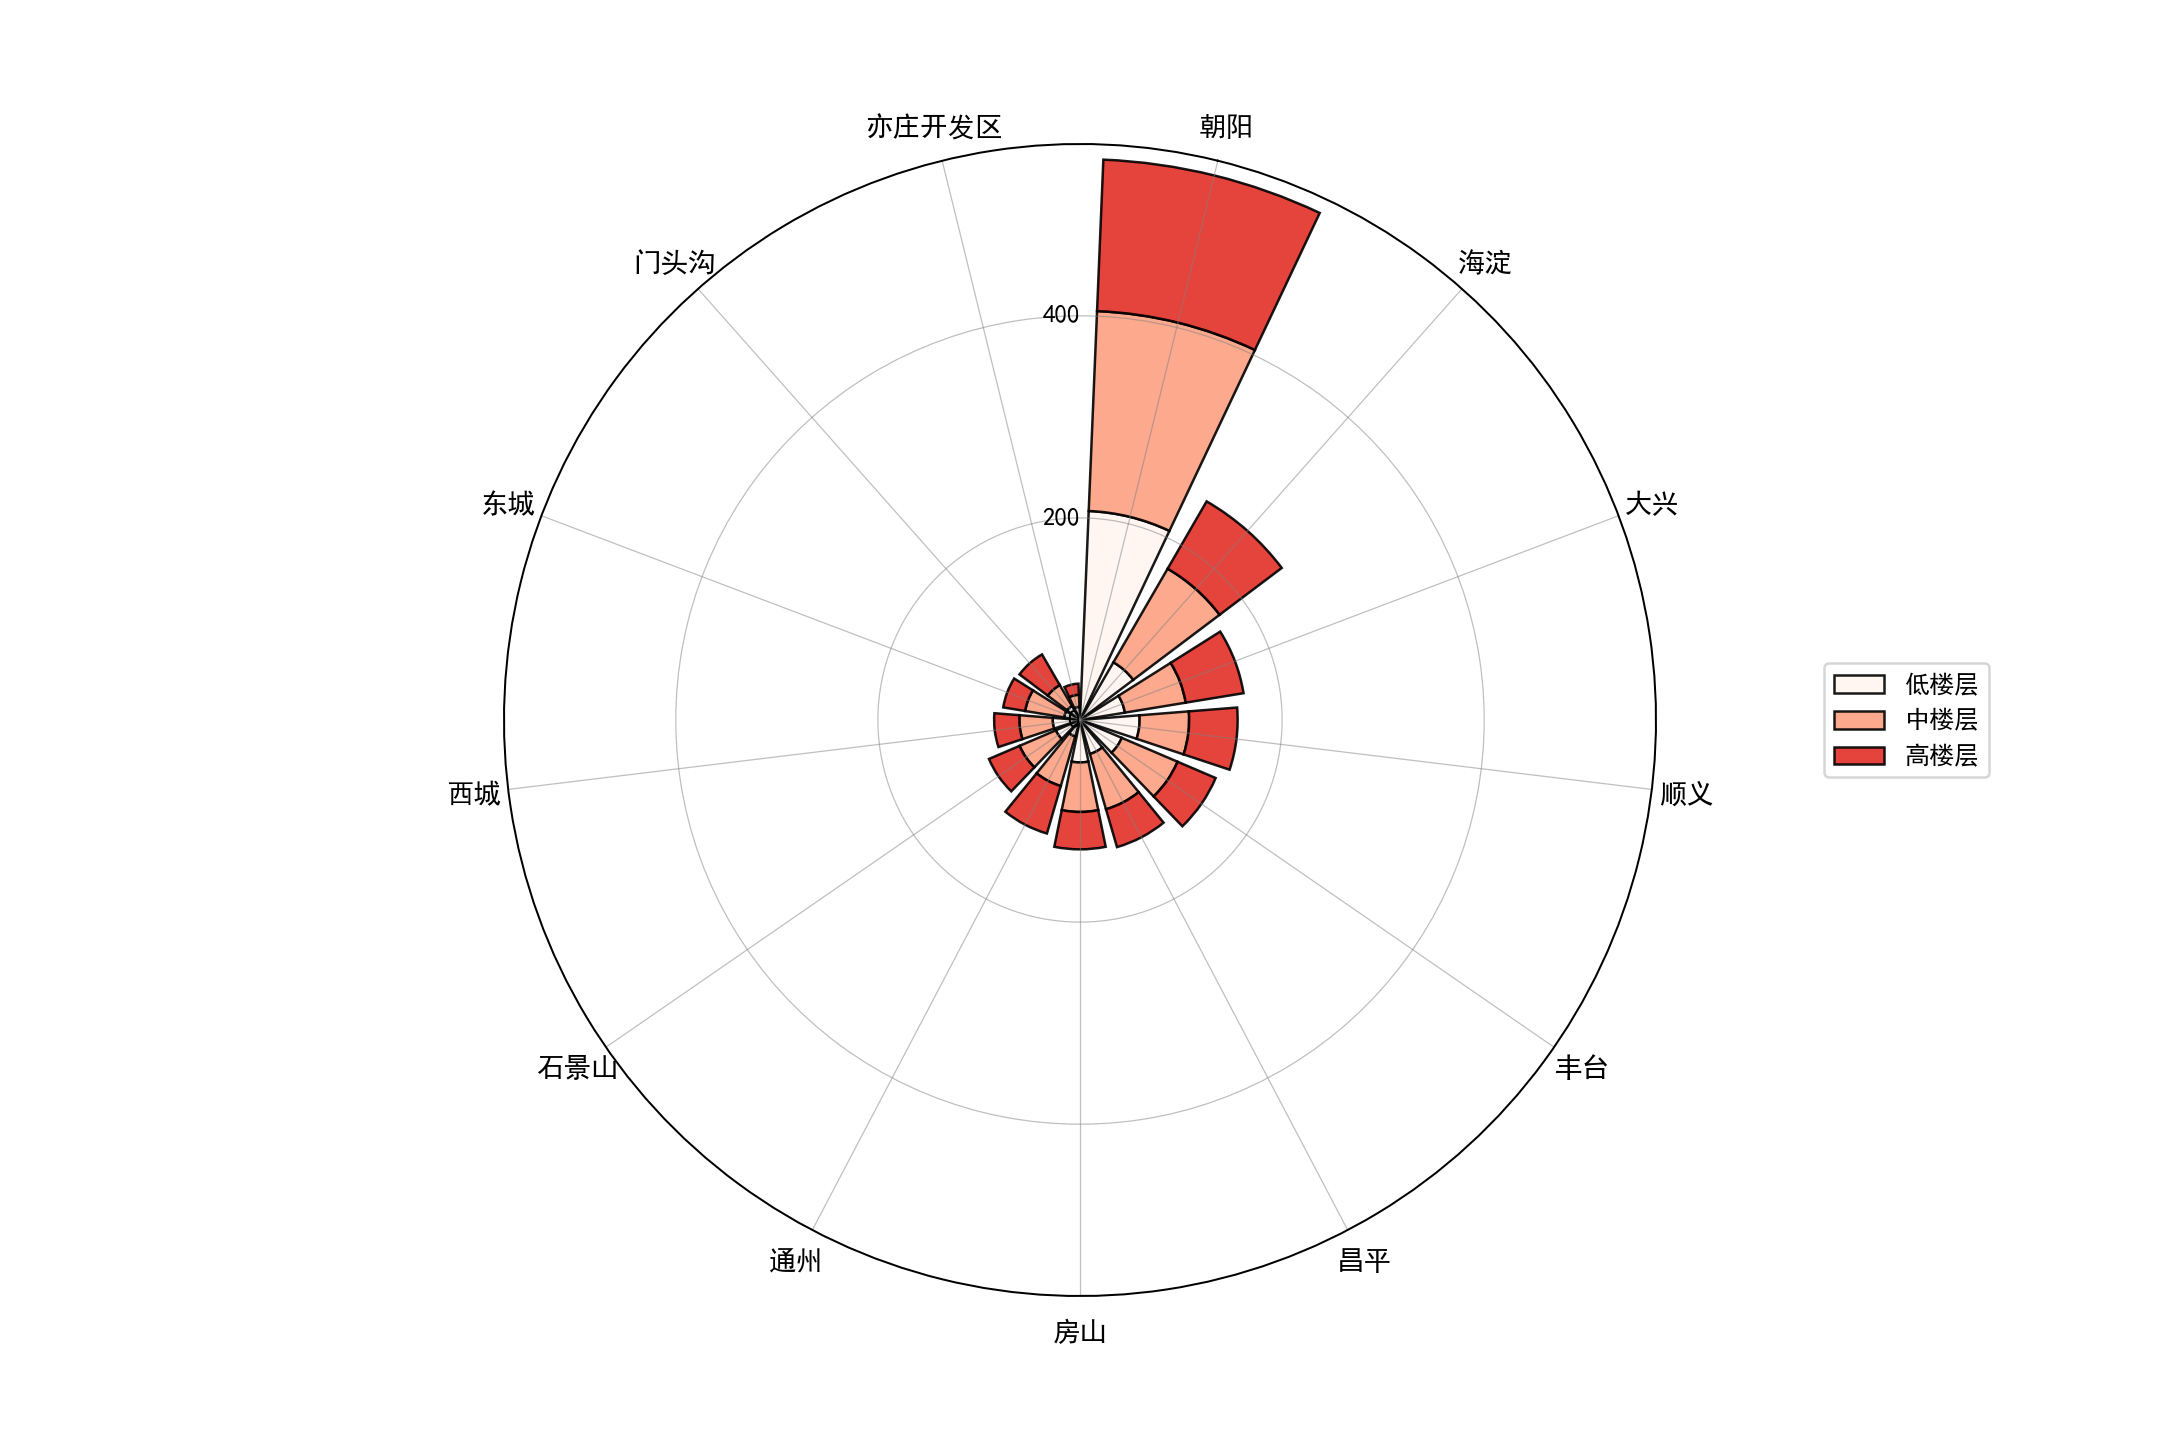

In [97]:
#探究不同区域的楼层分布的南丁格尔玫瑰图
#不同区域的楼层数统计
data1 = data.groupby(['区域','楼层']).size().rename('count').reset_index()
data1=data1.pivot_table(index='区域', columns='楼层', values='count').reset_index(drop=False)
data1['sum'] = data1.iloc[:,1:].apply(lambda x:x.sum(),axis=1)
data1.sort_values(by='sum',ascending=False,inplace=True)
data1 = data1.drop(columns=['sum'])

from matplotlib import cm, colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
#matplotlib 显示中文
plt.rcParams['font.sans-serif']=['SimHei']
n_row = data1.shape[0]
n_col = data1.shape[1]
angle = np.arange(0, 2*np.pi, 2*np.pi/n_row)

radius1 = np.array(data1.低楼层)
radius2 = np.array(data1.中楼层)
radius3 = np.array(data1.高楼层)
cmap = cm.get_cmap('Reds', n_col) #获取颜色主题Reds的Hex颜色编码
color = [colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig = figure(figsize=(12, 8), dpi=90)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.set_theta_offset(np.pi/2 - np.pi/n_row)
ax.set_theta_direction(-1)
ax.set_rlabel_position(360-180/n_row)


p1 = plt.bar(angle, radius1, color=color[0], edgecolor='k', width=0.4, alpha=0.9, label='低楼层')
p2 = plt.bar(angle, radius2, color=color[1], edgecolor='k', width=0.4, bottom=radius1, alpha=0.9, label='中楼层')
p3 = plt.bar(angle, radius3, color=color[2], edgecolor='k', width=0.4, bottom=radius1+radius2, alpha=0.9, label='高楼层')

plt.legend(loc='right',bbox_to_anchor=(1.3, 0, 0, 1))
plt.xticks(angle, labels=data1.区域,size=11) #X轴标签
plt.ylim(0, 570)
plt.yticks(np.arange(0, 600, 200), verticalalignment='center', horizontalalignment='right')#horizontalalignment='right',右侧与90度垂直线对齐
plt.grid(which='major', axis='x', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.show()

C:\Users\Mo\AppData\Local\Temp\ipykernel_79184\2220053411.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


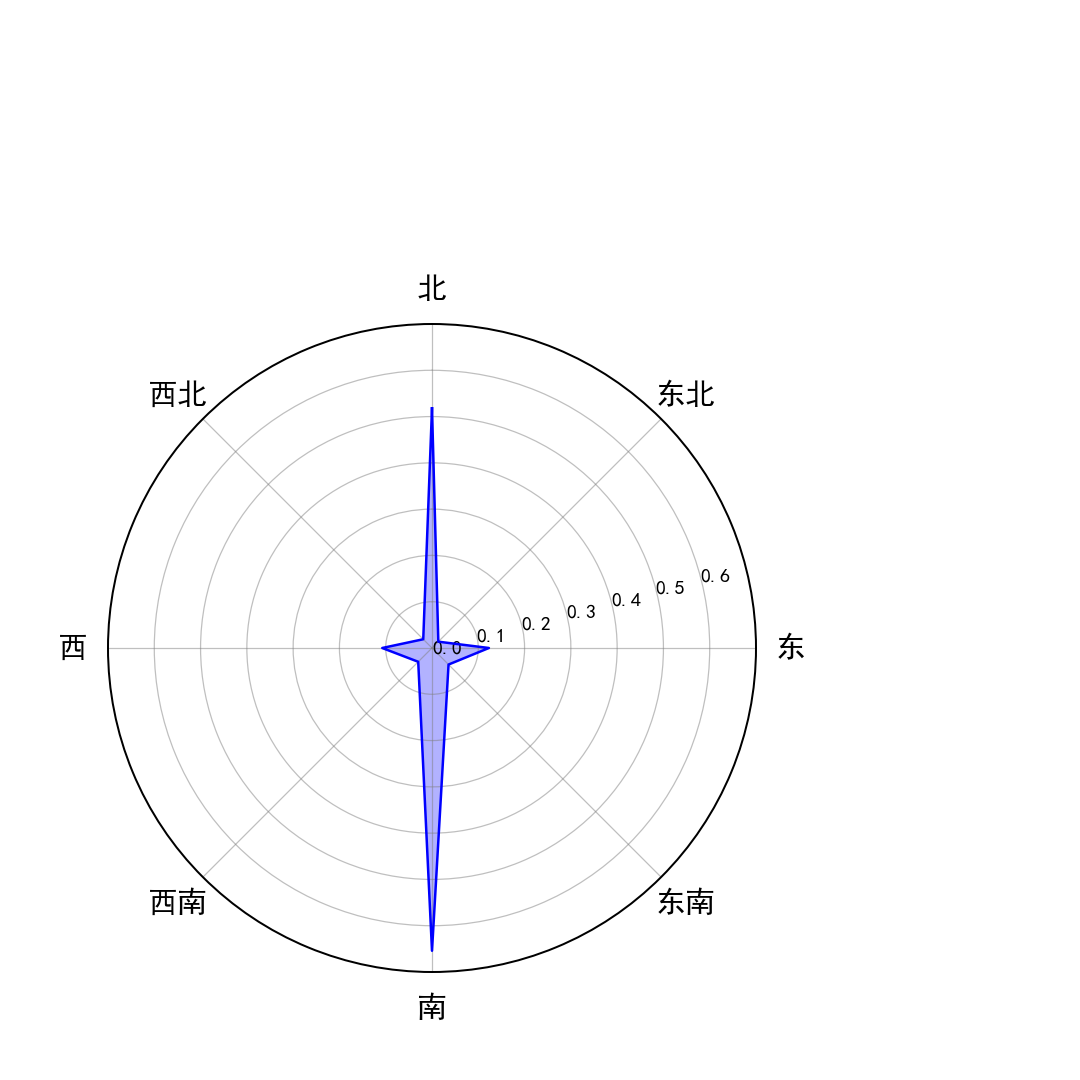

In [109]:
from matplotlib import cm, colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
data2 = data[['北','东北','东','东南','南','西南','西','西北']]
N = data2.shape[0]
data2.loc['sum'] = data2.apply(lambda x: x.sum())/N
direction = data2.loc['sum'].reset_index()

N = direction.shape[0]
angles = [n/float(N)*2*np.pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(6, 6), dpi=90)
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

plt.xticks(angles[:-1], labels=direction['index'], color='k', size=12)
plt.ylim(0, 0.7)
plt.yticks(np.arange(0, 0.7, 0.1), color='k', size=8, verticalalignment='center', horizontalalignment='left')
#horizontalalignment='right',右侧与90度垂直线对齐
plt.grid(which='major', axis='x', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)

values=direction['sum'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, 'blue', alpha=0.3)
ax.plot(angles, values,  markerfacecolor='#7FBC41', markersize=2, color='blue', linewidth=1)
ax.set_rlabel_position(75)
plt.show()

## 数据建模分析 

In [7]:
#将分类变量处理成数值型（除楼层以外均为二分类变量，因此处理成1和0，楼层变量与高度相关，因此从低楼层到高楼层分别设为0，1，2,区域则展开成one-hot编码）
data_m = data
n = len(data_m)
for i in range(n):
    if data['楼层'][i] == '低楼层':
        data_m['楼层'][i] = 0
    elif data['楼层'][i] == '中楼层':
        data_m['楼层'][i] = 1
    else:
        data_m['楼层'][i] = 2
        
    if data['车位'][i] == '租用车位':
        data_m['车位'][i] = 0
    else:
        data_m['车位'][i] = 1
        
    if data['用电'][i] == '民电':
        data_m['用电'][i] = 0
    else:
        data_m['用电'][i] = 1
        
    if data['采暖'][i] == '自采暖':
        data_m['采暖'][i] = 0
    else:
        data_m['采暖'][i] = 1  
        
    if data['电梯'][i] == '无':
        data_m['电梯'][i] = 0
    else:
        data_m['电梯'][i] = 1
        
    if data['用水'][i] == '民水':
        data_m['用水'][i] = 0
    else:
        data_m['用水'][i] = 1
        
    if data['燃气'][i] == '无':
        data_m['燃气'][i] = 0
    else:
        data_m['燃气'][i] = 1
data_m

C:\Users\Mo\AppData\Local\Temp\ipykernel_104968\646246156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['楼层'][i] = 0
C:\Users\Mo\AppData\Local\Temp\ipykernel_104968\646246156.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['车位'][i] = 0
C:\Users\Mo\AppData\Local\Temp\ipykernel_104968\646246156.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['用电'][i] = 1
C:\Users\Mo\AppData\Local\Temp\ipykernel_104968

,单位面积租金,地铁距离,房屋面积,楼层,车位,用电,采暖,电梯,用水,燃气,区域,北,东北,东,东南,南,西南,西,西北
0,348.837209,175,86.00,0,0,1,1,0,1,1,海淀,1,0,0,0,1,0,0,0
1,299.645873,508,183.55,0,0,0,1,1,0,1,西城,0,0,0,0,1,0,0,0
2,265.957447,473,376.00,0,1,0,0,0,0,1,亦庄开发区,1,0,0,0,1,0,0,0
3,261.363636,832,88.00,0,0,1,1,1,0,0,朝阳,1,0,0,1,1,0,0,0
4,256.410256,574,78.00,1,0,0,1,1,0,1,西城,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,27.475130,2000,105.55,1,0,0,1,0,0,1,房山,1,0,0,0,1,0,1,0
2014,25.033699,2000,103.86,0,1,0,1,0,0,1,房山,1,0,0,0,1,0,0,0
2015,22.411953,1166,93.70,0,1,1,1,1,1,0,房山,1,0,0,0,1,0,0,0
2016,22.123894,2000,226.00,1,0,0,1,0,0,1,顺义,1,0,0,0,0,0,1,0


In [8]:
#处理区域分类变量
from sklearn.preprocessing import OneHotEncoder
district = data_m['区域'].values
one_hot=OneHotEncoder() # One-Hot编码
data_temp=pd.DataFrame(one_hot.fit_transform(data_m[['区域']]).toarray(),
             columns=one_hot.get_feature_names_out(['区域']),dtype='int32')
data_onehot=pd.concat((data_m,data_temp),axis=1)    #也可以用merge,join

data_total=data_onehot.drop('区域',axis=1)
data_total

,单位面积租金,地铁距离,房屋面积,楼层,车位,用电,采暖,电梯,用水,燃气,...,区域_大兴,区域_房山,区域_昌平,区域_朝阳,区域_海淀,区域_石景山,区域_西城,区域_通州,区域_门头沟,区域_顺义
0,348.837209,175,86.00,0,0,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,299.645873,508,183.55,0,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,265.957447,473,376.00,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,261.363636,832,88.00,0,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,256.410256,574,78.00,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,27.475130,2000,105.55,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2014,25.033699,2000,103.86,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2015,22.411953,1166,93.70,0,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2016,22.123894,2000,226.00,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## 随机森林 

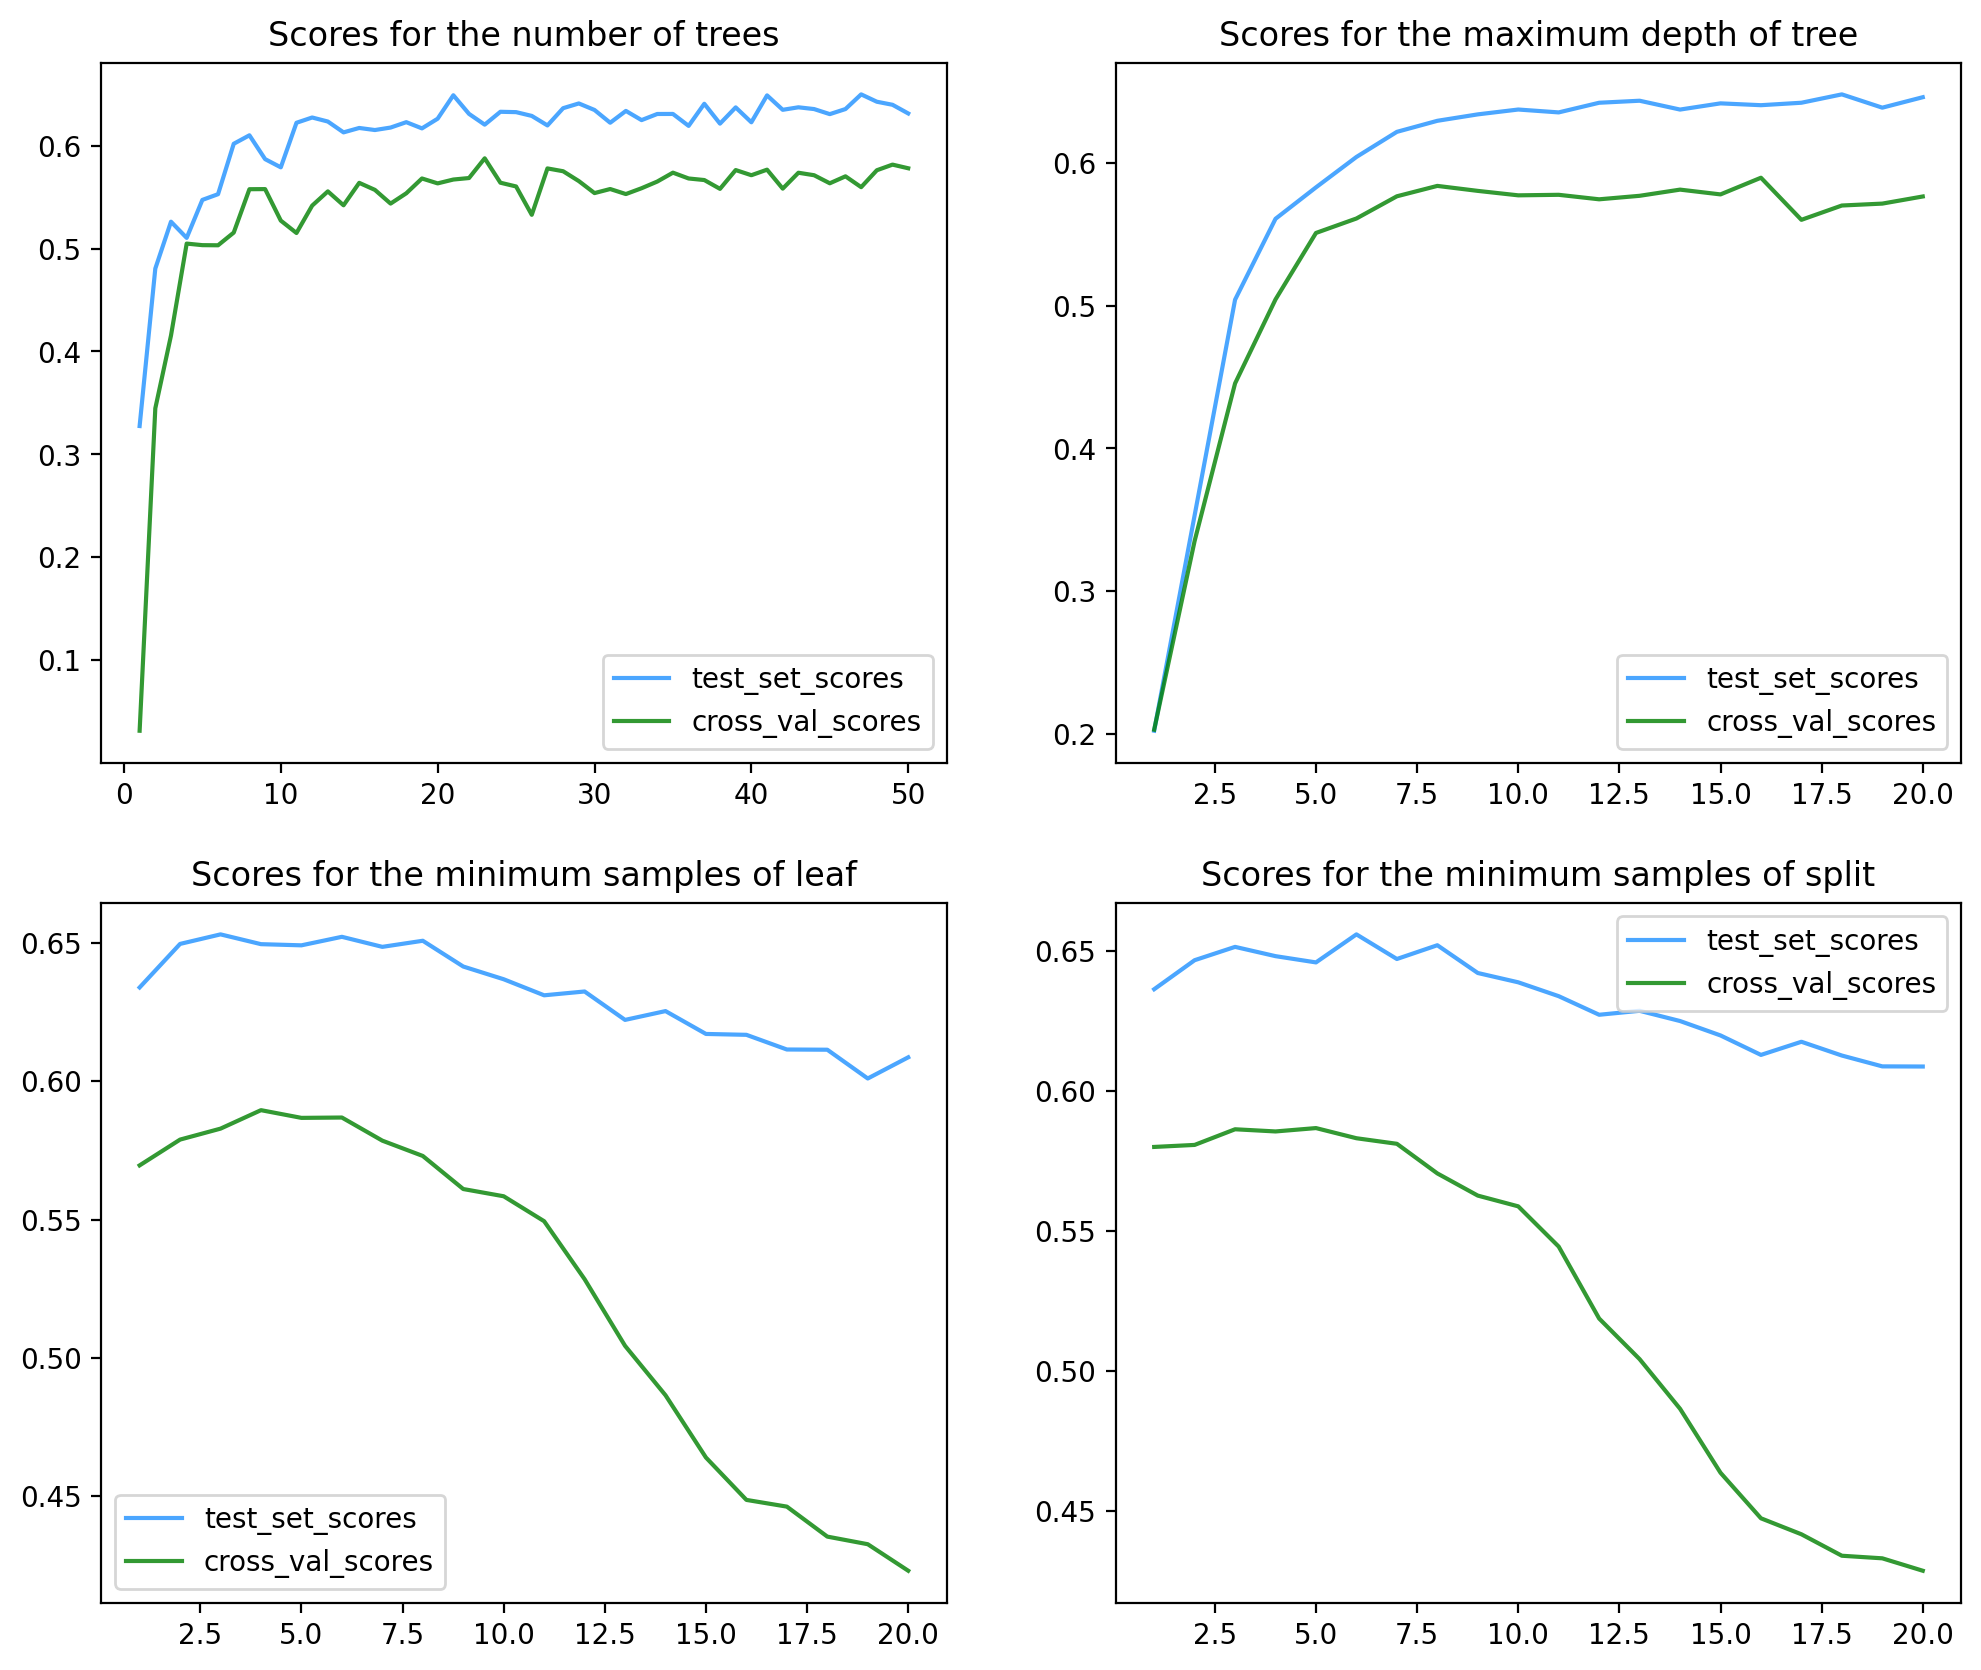

In [9]:
# 准备训练数据
x = data_total.iloc[:, 1:].values
y = data_total.iloc[:, 0].values

# 将数据分为训练集和测试集
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from matplotlib import pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)


# 调整参数：n_estimators（森林中的决策树数量），构建模型，绘制交叉验证得分图像
trees = list()
cross_val_scores = list()
test_set_scores = list()
for i in range(1,51):
    rf = RandomForestRegressor(n_estimators=i)
    rf.fit(x_train, y_train)
    scores = cross_val_score(rf, x_test, y_test)
    cross_val_scores.append(scores.mean())
    test_set_scores.append(rf.score(x_test, y_test))
    trees.append(i)
fig = plt.figure(figsize=(12,10), dpi=200)
ax1 = fig.add_subplot(221)      # 接下来总共要绘制4个子图合在一起
ax1.plot(trees, test_set_scores, color='dodgerblue', alpha=0.8)
ax1.plot(trees, cross_val_scores, color='g', alpha=0.8)
ax1.set_title('Scores for the number of trees')
ax1.legend(labels=['test_set_scores', 'cross_val_scores'])

# 调整参数：max_depth（树的最大深度），构建模型，绘制交叉验证得分图像
trees = list()
cross_val_scores = list()
test_set_scores = list()
for i in range(1,21):
    rf = RandomForestRegressor(max_depth=i)
    rf.fit(x_train, y_train)
    scores = cross_val_score(rf, x_test, y_test)
    cross_val_scores.append(scores.mean())
    test_set_scores.append(rf.score(x_test, y_test))
    trees.append(i)
ax2 = fig.add_subplot(222)
ax2.plot(trees, test_set_scores, color='dodgerblue', alpha=0.8)
ax2.plot(trees, cross_val_scores, color='g', alpha=0.8)
ax2.set_title('Scores for the maximum depth of tree')
ax2.legend(labels=['test_set_scores', 'cross_val_scores'])

# 调整参数：min_samples_leaf（叶子的最小样本数量），构建模型，绘制交叉验证得分图像
trees = list()
cross_val_scores = list()
test_set_scores = list()
for i in range(1,21):
    rf = RandomForestRegressor(min_samples_leaf=i)
    rf.fit(x_train, y_train)
    scores = cross_val_score(rf, x_test, y_test)
    cross_val_scores.append(scores.mean())
    test_set_scores.append(rf.score(x_test, y_test))
    trees.append(i)
ax1 = fig.add_subplot(223)
ax1.plot(trees, test_set_scores, color='dodgerblue', alpha=0.8)
ax1.plot(trees, cross_val_scores, color='g', alpha=0.8)
ax1.set_title('Scores for the minimum samples of leaf')
ax1.legend(labels=['test_set_scores', 'cross_val_scores'])

# 调整参数：min_samples_split（分裂内部节点需要的最少样例数），构建模型，绘制交叉验证得分图像
trees = list()
cross_val_scores = list()
test_set_scores = list()
for i in range(1,21):
    rf = RandomForestRegressor(min_samples_leaf=i)
    rf.fit(x_train, y_train)
    scores = cross_val_score(rf, x_test, y_test)
    cross_val_scores.append(scores.mean())
    test_set_scores.append(rf.score(x_test, y_test))
    trees.append(i)
ax1 = fig.add_subplot(224)
ax1.plot(trees, test_set_scores, color='dodgerblue', alpha=0.8)
ax1.plot(trees, cross_val_scores, color='g', alpha=0.8)
ax1.set_title('Scores for the minimum samples of split')
ax1.legend(labels=['test_set_scores', 'cross_val_scores'])

plt.show()

In [10]:
np.random.seed(2024)
import sklearn.metrics as sm
import math
#经过多次调整后，在如下参数上的随机森林表现最佳
rf = RandomForestRegressor(n_estimators = 35,max_depth=16,min_samples_split=5,min_samples_leaf=6)

x = data_total.iloc[:, 1:].values
y = data_total.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)
rf.fit(x_train, y_train)

prd_y = rf.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
# 计算MSE和R-squared
mse = mean_squared_error(y_test, prd_y)
r2 = r2_score(y_test, prd_y)
 
# 输出模型评估结果和目标方程
print("平均绝对值误差:", sm.mean_absolute_error(y_test, prd_y))
print('MSE:', mse)
print('RMSE:', math.sqrt(mse))
print('R-squared:', r2)

平均绝对值误差: 17.00589146778654
MSE: 633.6283754380057
RMSE: 25.171975993910486
R-squared: 0.6569168688081535


## 线性回归 

In [11]:
import sklearn.linear_model as lm
import sklearn.metrics as sm
# 构建线性回归模型
x = data_total.iloc[:, 1:].values
y = data_total.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)
model = lm.LinearRegression()
model.fit(x_train, y_train)
# 针对训练数据 得到结果
prd_y = model.predict(x_test)

# 评估当前模型
print("平均绝对值误差:", sm.mean_absolute_error(y_test, prd_y))
print("平均平方误差:", sm.mean_squared_error(y_test, prd_y))
print('RMSE:', math.sqrt(sm.mean_squared_error(y_test, prd_y)))
print("R2得分:", sm.r2_score(y_test, prd_y))

平均绝对值误差: 19.22589356085408
平均平方误差: 739.1676054253685
RMSE: 27.18763699598346
R2得分: 0.5997718120347553


## XGBoost

In [20]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# 创建示例数据
x = data_total.iloc[:, 1:].values
y = data_total.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

# 特征归一化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': range(10,60,5),
    'max_depth': range(1,10),
}
# 创建 XGBRegressor 模型
xgb_model = XGBRegressor(objective='reg:squarederror')

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


# 对训练数据进行网格搜索
grid_search.fit(X_train_scaled, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
best_model = grid_search.best_estimator_
# 使用模型进行预测
y_pred = best_model.predict(X_test_scaled)

# 计算 MSE
print("平均绝对值误差:", sm.mean_absolute_error(y_test, y_pred))
print("平均平方误差:", sm.mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(sm.mean_squared_error(y_test, y_pred)))
print("R2得分:", sm.r2_score(y_test, y_pred))

Best parameters: {'max_depth': 4, 'n_estimators': 30}
平均绝对值误差: 16.526787452451988
平均平方误差: 613.5200772513695
RMSE: 24.769337440702152
R2得分: 0.6678046670385303


In [21]:
#进一步调整参数
x = data_total.iloc[:, 1:].values
y = data_total.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

# 特征归一化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {
    'n_estimators': range(20,40),
    'max_depth': [3,4,5],
}
# 创建 XGBRegressor 模型
xgb_model = XGBRegressor(objective='reg:squarederror')

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error')


# 对训练数据进行网格搜索
grid_search.fit(X_train_scaled, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
best_model = grid_search.best_estimator_
# 使用模型进行预测
y_pred = best_model.predict(X_test_scaled)

# 计算 MSE
print("平均绝对值误差:", sm.mean_absolute_error(y_test, y_pred))
print("平均平方误差:", sm.mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(sm.mean_squared_error(y_test, y_pred)))
print("R2得分:", sm.r2_score(y_test, y_pred))

Best parameters: {'max_depth': 4, 'n_estimators': 30}
平均绝对值误差: 16.526787452451988
平均平方误差: 613.5200772513695
RMSE: 24.769337440702152
R2得分: 0.6678046670385303


## 模型预测（包含类的定义、异常处理和调用函数等内容）

In [24]:
#定义一个出租房的类，包含数据集中所有自变量的信息用于后续预测
class House:
    def __init__(self,地铁距离=None,房屋面积=None,楼层=None,车位=None,用电=None,采暖=None,电梯=None,用水=None,燃气=None,区域=None,朝向=None):
        try:
            if 地铁距离 is None:
                raise ValueError('地铁距离缺失')
            else:
                try:
                    self.地铁距离 = float(地铁距离)
                except ValueError:
                    print('地铁距离需要是数字')
                    
            if 房屋面积 is None:
                raise ValueError('房屋面积缺失')
            else:
                try:
                    self.房屋面积 = float(房屋面积)
                except ValueError:
                    print('房屋面积需要是数字')
                    
            if 楼层 is None:
                raise ValueError('楼层缺失')
            elif 楼层 not in ['低楼层','中楼层','高楼层']:
                print('楼层输入需要是“低楼层”,“中楼层”,“高楼层”')
            else:
                self.楼层 = 楼层
                
            if 车位 is None:
                raise ValueError('车位缺失')
            elif 车位 not in ['租用车位','免费车位']:
                print('车位输入需要是“租用车位”,“免费车位”')
            else:
                self.车位 = 车位
                
            if 用电 is None:
                raise ValueError('用电缺失')
            elif 用电 not in ['民电','商电']:
                print('用电输入需要是“民电”,“商电”')
            else:
                self.用电 = 用电
                
            if 采暖 is None:
                raise ValueError('采暖缺失')
            elif 采暖 not in ['自采暖','集中供暖']:
                print('采暖输入需要是“自采暖”,“集中供暖”')
            else:
                self.采暖 = 采暖
                
            if 电梯 is None:
                raise ValueError('电梯缺失')
            elif 电梯 not in ['有','无']:
                print('电梯输入需要是“有”,“无”')
            else:
                self.电梯 = 电梯
                
            if 用水 is None:
                raise ValueError('用水缺失')
            elif 用水 not in ['民水','商水']:
                print('用水输入需要是“民水”,“商水”')
            else:
                self.用水 = 用水
            
            if 燃气 is None:
                raise ValueError('燃气缺失')
            elif 燃气 not in ['有','无']:
                print('采暖输入需要是“有”,“无”')
            else:
                self.燃气 = 燃气
                
            if 区域 is None:
                raise ValueError('区域缺失')
            elif 区域 not in ['海淀','朝阳','东城','西城','大兴','丰台','房山','亦庄开发区','门头沟','顺义','昌平','石景山','通州']:
                print('区域输入需要是“海淀”,“朝阳”，“东城”，“西城”，“大兴”，“丰台”，“房山”，“亦庄开发区”，“门头沟”，“顺义”，“昌平”，“石景山”，“通州”')
            else:
                self.区域 = 区域
                
            if 朝向 is None:
                raise ValueError('朝向缺失')
            elif 朝向 not in ['东','西','南','北','东南','东北','西南','西北']:
                print('朝向输入需要是“东西南北”,“东南东北西南西北”')
            else:
                self.朝向 = 朝向
        except ValueError as e:
            print("Error:", e)
            print('请按地铁距离、房屋面积、楼层、车位、用电、采暖、电梯、用水、燃气、区域、朝向的顺序输入')
    def info(self):
        print('地铁距离：{}'.format(self.地铁距离))
        print('房屋面积：{}'.format(self.房屋面积))
        print('楼层：{}'.format(self.楼层))
        print('车位：{}'.format(self.车位))
        print('用电：{}'.format(self.用电))
        print('采暖：{}'.format(self.采暖))
        print('电梯：{}'.format(self.电梯))
        print('用水：{}'.format(self.用水))
        print('楼层：{}'.format(self.楼层))
        print('燃气：{}'.format(self.燃气))
        print('区域：{}'.format(self.区域))
        print('朝向：{}'.format(self.朝向))
    def function(self):
        s=[]
        s.append(self.地铁距离)
        s.append(self.房屋面积)
        if self.楼层 == '低楼层':
            s.append(0)
        elif self.楼层 == '中楼层':
            s.append(1)
        else:
            s.append(2)

        if self.车位 == '租用车位':
            s.append(0)
        else:
            s.append(1)

        if self.用电 == '民电':
            s.append(0)
        else:
            s.append(1)

        if self.采暖 == '自采暖':
            s.append(0)
        else:
            s.append(1)  

        if self.电梯 == '无':
            s.append(0)
        else:
            s.append(1)

        if self.用水 == '民水':
            s.append(0)
        else:
            s.append(1)

        if self.燃气 == '无':
            s.append(0)
        else:
            s.append(1)
        
        for i in ['北','东北', '东', '东南', '南', '西南', '西', '西北']:
            if self.朝向 == i:
                s.append(1)
            else:
                s.append(0)
                
        for i in ['区域_东城', '区域_丰台', '区域_亦庄开发区','区域_大兴', '区域_房山', '区域_昌平', '区域_朝阳', '区域_海淀', '区域_石景山',
                  '区域_西城', '区域_通州','区域_门头沟', '区域_顺义']:
            if self.区域 in i:
                s.append(1)
            else:
                s.append(0)
        
        #模型预测
        s = np.array(s)
        s = s.reshape(1, -1)  
        prd_y = rf.predict(s)
        print("随机森林的预测结果为：{:.2f}元".format(prd_y[0]))
        y_prd = model.predict(s)
        print("线性回归的预测结果为：{:.2f}元".format(y_prd[0]))
        y_pred = best_model.predict(s)
        print("XGBoost的预测结果为：{:.2f}元".format(y_pred[0]))

In [28]:
#构建一个对象（无异常版）
h=House(656,47.82,'中楼层','租用车位','民电','集中供暖','无','民水','有','丰台','北')
#预测
h.function()

随机森林的预测结果为：106.12元
线性回归的预测结果为：86.87元
XGBoost的预测结果为：105.16元


In [31]:
#构建一个对象（有异常版）
h=House(1000,'未知','低楼层','租用车位','商电','集中供暖','有','商水','有','广州','南')

房屋面积需要是数字
区域输入需要是“海淀”,“朝阳”，“东城”，“西城”，“大兴”，“丰台”，“房山”，“亦庄开发区”，“门头沟”，“顺义”，“昌平”，“石景山”，“通州”
